In [2]:
from evaluate import *

In [50]:
base_folder = "Output/Reproduce"

linreg_baseline_c = {
    "DATASET_DESCRIPTION": {},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "LinReg_Pixelwise"}
}
randomforest_baseline_c = {
    "DATASET_DESCRIPTION": {},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "RandomForest_Pixelwise"}
}
pca_baseline_c = {
    "DATASET_DESCRIPTION": {},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "PCA_Flat",
                                  "REGTYPE": "linreg"}
}

unet_unmodified_c = {
    "DATASET_DESCRIPTION": {},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": False,
                                  "USE_CYLINDRICAL_PADDING": False,
                                  "LOSS": "MSELoss"}
}


In [55]:
descriptions_u_u, predictions_u_u, gt_u_u = load_data_for_comparison(base_folder, unet_unmodified_c)

10 matching runs found


In [58]:
r2 = np.zeros(len(predictions_u_u))
for i in range(len(predictions_u_u)):
    r2[i] = get_weighted_average(get_r2(predictions_u_u[i], gt_u_u[i]), descriptions_u_u[i]["DATASET_DESCRIPTION"])

In [42]:
descriptions_pca_flat, predictions_pca_flat, gt_pca_flat = load_data_for_comparison(base_folder, pca_baseline_c)

1 matching runs found


In [43]:
descriptions_linreg_pixelwise, predictions_linreg_pixelwise, gt_linreg_pixelwise = load_data_for_comparison(base_folder, linreg_baseline_c)

2 matching runs found


In [44]:
descriptions_rf, predictions_rf, gt_rf = load_data_for_comparison(base_folder, randomforest_baseline_c)

1 matching runs found


In [45]:
r2_rf = get_r2(prediction_rf[0], gt_rf[0])
r2_linreg_pixelwise = get_r2(prediction_linreg_pixelwise[0], gt_linreg_pixelwise[0])
r2_pca_flat = get_r2(predictions_pca_flat[0], gt_pca_flat[0])

In [49]:
print("Pixelwise RF, R2_mean = {}".format(get_weighted_average(r2_rf, descriptions_rf[0]["DATASET_DESCRIPTION"])))
print("Pixelwise LinReg, R2_mean = {}".format(get_weighted_average(r2_linreg_pixelwise, descriptions_linreg_pixelwise[0]["DATASET_DESCRIPTION"])))
print("PCA-reg, R2_mean = {}".format(get_weighted_average(r2_pca_flat, descriptions_pca_flat[0]["DATASET_DESCRIPTION"])))

Pixelwise RF, R2_mean = [0.13883942]
Pixelwise LinReg, R2_mean = [0.16850054]
PCA-reg, R2_mean = [0.18927306]


In [9]:
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

Precip_weighting: False
UNet_Flat
early_stopping
AreaWeightedMSELoss
Non-weighted mean: [0.23578436]


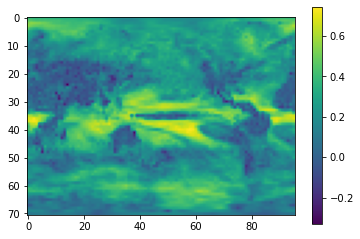

In [10]:
i = 0
r2 = get_r2(b[i], c[i])
print("Precip_weighting:", a[i]["DATASET_DESCRIPTION"]["PRECIP_WEIGHTING"])
print(a[i]["MODEL_TRAINING_DESCRIPTION"]["MODEL_TYPE"])
if a[i]["MODEL_TRAINING_DESCRIPTION"]["MODEL_TYPE"] in ["UNet_Flat", "UNet_Ico"]:
    print(a[i]["MODEL_TRAINING_DESCRIPTION"]["NUM_EPOCHS"])
    print(a[i]["MODEL_TRAINING_DESCRIPTION"]["LOSS"])
    

print("Non-weighted mean:", get_weighted_average(r2, a[i]["DATASET_DESCRIPTION"]))
plt.imshow(r2[0])
plt.colorbar()

In [6]:
a[i]["DATASET_DESCRIPTION"]

{'DATASETS_USED': ['isotopes', 'temp', 'precip'],
 'PREDICTOR_VARIABLES': {'temp': ['temp_1'], 'precip': ['precip']},
 'TARGET_VARIABLES': {'isotopes': ['dO18']},
 'DATASETS_NO_GAPS': ['isotopes', 'temp', 'precip', 'slp'],
 'CLIMATE_MODEL': 'iHadCM3',
 'GRID_TYPE': 'Flat',
 'START_YEAR': 654,
 'END_YEAR': 1654,
 'LATITUDES_SLICE': [1, -1],
 'TEST_FRACTION': 0.1,
 'DO_SHUFFLE': False,
 'PRECIP_WEIGHTING': False,
 'TIMESCALE': 'YEARLY',
 'LATITUDES': (87.5,
  85.0,
  82.5,
  80.0,
  77.5,
  75.0,
  72.5,
  70.0,
  67.5,
  65.0,
  62.5,
  60.0,
  57.5,
  55.0,
  52.5,
  50.0,
  47.5,
  45.0,
  42.5,
  40.0,
  37.5,
  35.0,
  32.5,
  30.0,
  27.5,
  25.0,
  22.5,
  20.0,
  17.5,
  15.0,
  12.5,
  10.0,
  7.5,
  5.0,
  2.5,
  0.0,
  -2.5,
  -5.0,
  -7.5,
  -10.0,
  -12.5,
  -15.0,
  -17.5,
  -20.0,
  -22.5,
  -25.0,
  -27.5,
  -30.0,
  -32.5,
  -35.0,
  -37.5,
  -40.0,
  -42.5,
  -45.0,
  -47.5,
  -50.0,
  -52.5,
  -55.0,
  -57.5,
  -60.0,
  -62.5,
  -65.0,
  -67.5,
  -70.0,
  -72.5,
  -75.

Precip_weighting: False
UNet_Flat
early_stopping
AreaWeightedMSELoss
Non-weighted mean: [0.24152036]


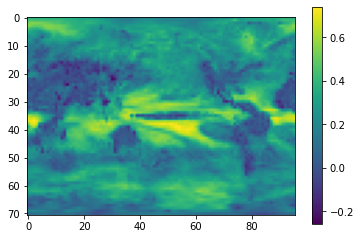

In [5]:
i = 1
r2 = get_r2(b[i], c[i])
print("Precip_weighting:", a[i]["DATASET_DESCRIPTION"]["PRECIP_WEIGHTING"])
print(a[i]["MODEL_TRAINING_DESCRIPTION"]["MODEL_TYPE"])
if a[i]["MODEL_TRAINING_DESCRIPTION"]["MODEL_TYPE"] in ["UNet_Flat", "UNet_Ico"]:
    print(a[i]["MODEL_TRAINING_DESCRIPTION"]["NUM_EPOCHS"])
    print(a[i]["MODEL_TRAINING_DESCRIPTION"]["LOSS"])
    

print("Non-weighted mean:", get_weighted_average(r2, a[i]["DATASET_DESCRIPTION"]))
plt.imshow(r2[0])
plt.colorbar()

In [8]:
a[0]["DATASET_DESCRIPTION"]

{'DATASETS_USED': ['isotopes', 'temp', 'precip'],
 'PREDICTOR_VARIABLES': {'temp': ['temp_1'], 'precip': ['precip']},
 'TARGET_VARIABLES': {'isotopes': ['dO18']},
 'DATASETS_NO_GAPS': ['isotopes', 'temp', 'precip', 'slp'],
 'CLIMATE_MODEL': 'iHadCM3',
 'GRID_TYPE': 'Flat',
 'START_YEAR': 654,
 'END_YEAR': 1654,
 'LATITUDES_SLICE': [1, -1],
 'TEST_FRACTION': 0.1,
 'DO_SHUFFLE': False,
 'PRECIP_WEIGHTING': False,
 'TIMESCALE': 'YEARLY',
 'LATITUDES': (87.5,
  85.0,
  82.5,
  80.0,
  77.5,
  75.0,
  72.5,
  70.0,
  67.5,
  65.0,
  62.5,
  60.0,
  57.5,
  55.0,
  52.5,
  50.0,
  47.5,
  45.0,
  42.5,
  40.0,
  37.5,
  35.0,
  32.5,
  30.0,
  27.5,
  25.0,
  22.5,
  20.0,
  17.5,
  15.0,
  12.5,
  10.0,
  7.5,
  5.0,
  2.5,
  0.0,
  -2.5,
  -5.0,
  -7.5,
  -10.0,
  -12.5,
  -15.0,
  -17.5,
  -20.0,
  -22.5,
  -25.0,
  -27.5,
  -30.0,
  -32.5,
  -35.0,
  -37.5,
  -40.0,
  -42.5,
  -45.0,
  -47.5,
  -50.0,
  -52.5,
  -55.0,
  -57.5,
  -60.0,
  -62.5,
  -65.0,
  -67.5,
  -70.0,
  -72.5,
  -75.

In [9]:
a[1]["DATASET_DESCRIPTION"]

{'DATASETS_USED': ['isotopes', 'temp', 'precip'],
 'PREDICTOR_VARIABLES': {'temp': ['temp_1'], 'precip': ['precip']},
 'TARGET_VARIABLES': {'isotopes': ['dO18']},
 'DATASETS_NO_GAPS': ['isotopes', 'temp', 'precip', 'slp'],
 'CLIMATE_MODEL': 'iHadCM3',
 'GRID_TYPE': 'Flat',
 'START_YEAR': 654,
 'END_YEAR': 1654,
 'LATITUDES_SLICE': [1, -1],
 'TEST_FRACTION': 0.1,
 'DO_SHUFFLE': False,
 'PRECIP_WEIGHTING': False,
 'TIMESCALE': 'YEARLY',
 'LATITUDES': (87.5,
  85.0,
  82.5,
  80.0,
  77.5,
  75.0,
  72.5,
  70.0,
  67.5,
  65.0,
  62.5,
  60.0,
  57.5,
  55.0,
  52.5,
  50.0,
  47.5,
  45.0,
  42.5,
  40.0,
  37.5,
  35.0,
  32.5,
  30.0,
  27.5,
  25.0,
  22.5,
  20.0,
  17.5,
  15.0,
  12.5,
  10.0,
  7.5,
  5.0,
  2.5,
  0.0,
  -2.5,
  -5.0,
  -7.5,
  -10.0,
  -12.5,
  -15.0,
  -17.5,
  -20.0,
  -22.5,
  -25.0,
  -27.5,
  -30.0,
  -32.5,
  -35.0,
  -37.5,
  -40.0,
  -42.5,
  -45.0,
  -47.5,
  -50.0,
  -52.5,
  -55.0,
  -57.5,
  -60.0,
  -62.5,
  -65.0,
  -67.5,
  -70.0,
  -72.5,
  -75.

In [11]:
s1 = util.create_hash_from_description(a[1]["DATASET_DESCRIPTION"])
s1

'0x12bcb33a7bf0f213'